# Some Useful Hints

## Plot Bloch vector

A standard way to plot a quantum system is with the Bloch vector in the Bloch sphere. This only works for a single qubit and takes as input the Bloch vector.

The Bloch vector is defined as $[x = \mathrm{Tr}[X \rho], y = \mathrm{Tr}[Y \rho], z = \mathrm{Tr}[Z \rho]]$, where $X$, $Y$, and $Z$ are the Pauli operators for a single qubit and $\rho$ is the density matrix.


In [17]:
from qiskit.visualization import plot_bloch_vector

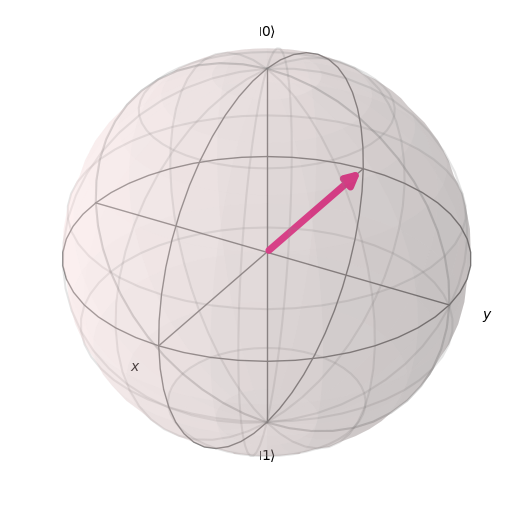

In [18]:
plot_bloch_vector([-1,0,0])

### Quantum Gate Playground

A nice tool to visualize Quantum computation: [Quantum Gate Playground
](https://davidbkemp.githu.io/quantum-gate-playground/)

# Deutsch's Algorithm

You are given an unknown balanced $f$ which is either constant or balanced. Determine if the function is constant or balanced. 


<img src="Image/img_1.png" width=600 />


The measure is $1$ with a probability of 1.0 if the function is balanced and  is $0$ with a probability of 1.0 if the function is constant. 

Let's consider the case in wich $n = 1$


### Constant Function

Consider the constant function $f(0)=1, f(1)=1$, whose circuit $U_{f}(x,y) = (x, y \oplus 1)$ is implemented as:


<img src="Image/img.png" width=600 />



#### Your Turn
Try to implement the algorith 


In [19]:
# TODO

### Balance Function

Consider the function $f(0)=0, f(1)=1$, whose circuit is $U_{f}(x,y) = (x, y \oplus x)$.

1. How do you implement this oracle?
2. Try to implement also the oracle for $f(0)=1, f(1)=0$


In [20]:
#TODO